In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import config
import geopandas as gpd


In [4]:

tibet_bounds = (73.50, 26.00, 104.42, 39.99)    # tibet
as_img_month = [122,122,122,122,117,117,113,122,123,122,122,122]
des_img_month = [104,101,107,96,110,107,116,115,118,113,113,111]
labels_month = ['January', 'February', 'March', 'April', 'May', 'June', \
                'July', 'August', 'September', 'October', 'November', 'December']
path_dset_loc =  config.root_proj + '/data/dset/loc_vec/dset_loc.shp'
path_tibet_vec =  config.root_proj + '/data/tibet/tibet-plateau-boundary/TPBoundary_HF/TPBoundary_HF_wgs84.shp'
path_s1as_fp =  config.root_proj + '/data/tibet/s1_footprint/s1_as_footprint.shp'
path_s1des_fp =  config.root_proj + '/data/tibet/s1_footprint/s1_des_footprint.shp'



In [5]:
geodf_as_fp = gpd.read_file(path_s1as_fp)
geodf_des_fp = gpd.read_file(path_s1des_fp)
print('ascending image:', len(geodf_as_fp))
print('descending image:', len(geodf_des_fp))


ascending image: 122
descending image: 115


In [6]:
## obtain centers coordinates of the scenes in dataset
geodf_des_fp = gpd.read_file(path_dset_loc)
centers = geodf_des_fp.centroid
coord_centers = []
for point in centers:
    coord_centers += list(point.coords)
coord_centers = np.array(coord_centers)


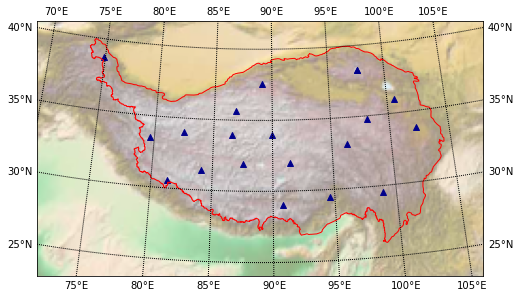

In [7]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=3.5E6, height=2E6, 
            lat_0=33, lon_0=88.96)

m.etopo(scale=0.5, alpha=0.5)
# m.shadedrelief(scale=0.5)

parallels = np.arange(0.,90, 5.)  # lat
m.drawparallels(parallels,labels=[True,True,False,False])   # labels=[left,right,top,bottom]
meridians = np.arange(0.,360.,5.)  # lon
m.drawmeridians(meridians,labels=[False,False,True,True])

# Map vector on the basemap
m.readshapefile(path_tibet_vec[:-4],'tibet_region', linewidth=1, color='r');
x, y = m(coord_centers[:,0], coord_centers[:,1])
plt.scatter(x, y, 35, color='darkblue', marker='^')


sum of ascending footprints: 122
sum of descending footprints: 20


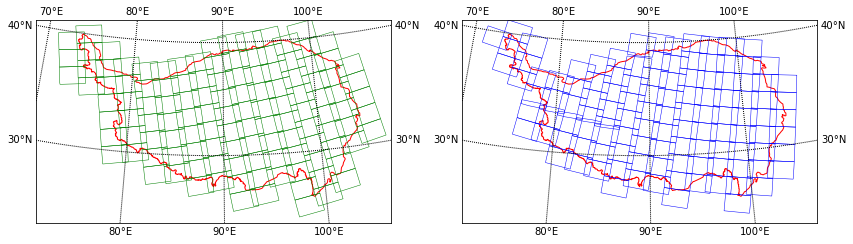

In [8]:
plt.figure(figsize=(14,4))

parallels = np.arange(0.,90, 10.)  # lat
meridians = np.arange(0.,360.,10.)  # lon

plt.subplot(1,2,1)
### ascending footprint
m = Basemap(projection='lcc', resolution=None,
            width=3.5E6, height=2E6, 
            lat_0=33, lon_0=88.96)
m.drawparallels(parallels,labels=[True,True,False,False])   # labels=[left,right,top,bottom]
m.drawmeridians(meridians,labels=[False,False,True,True])
m.readshapefile(path_tibet_vec[:-4],'tibet_region', linewidth=1, color='r');
m.readshapefile(path_s1as_fp[:-4],'ascending_footprint', linewidth=0.5, color='g');
print('sum of ascending footprints:', len(geodf_as_fp))

plt.subplot(1,2,2)
### descending footprint
m.drawparallels(parallels,labels=[True,True,False,False])   # labels=[left,right,top,bottom]
m.drawmeridians(meridians,labels=[False,False,True,True])
m.readshapefile(path_tibet_vec[:-4],'tibet_region', linewidth=1, color='r');
m.readshapefile(path_s1des_fp[:-4],'descending_footprint', linewidth=0.5, color='b');
print('sum of descending footprints:', len(geodf_des_fp))


Text(0, 0.5, 'Number of Sentinel-1 images')

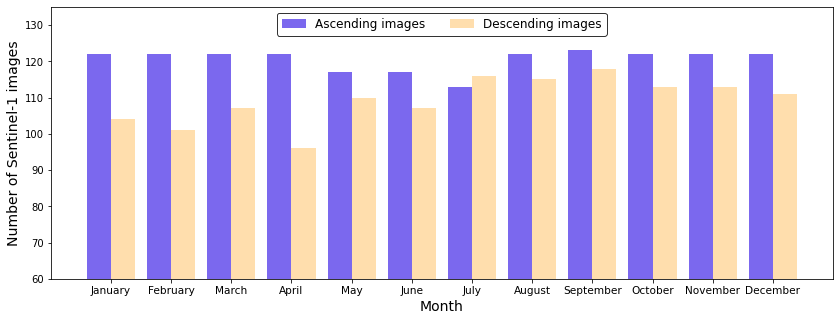

In [9]:
fig, ax = plt.subplots(figsize=(14,5))
width = 0.4
ax.bar(np.arange(12), as_img_month, width=width, color='MediumSlateBlue', label = "Ascending images");
ax.bar(np.arange(12)+width, des_img_month, width=width, color='NavajoWhite', label = "Descending images");
plt.xticks(np.arange(12) + width / 2, labels_month, fontsize=10.5, rotation=0);
plt.ylim([60, 135])
plt.legend(loc='upper center',ncol = 2, fontsize=12, frameon = True, edgecolor = 'black')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Sentinel-1 images', fontsize=14)
